## Observations and Insights 

- There is a positive correlation between average tumor volume and weight within the subject mice for Capomulin. The Correlation is 0.84.
- Capomulin and Ramicane had the most data points out of all the drugs present in the study.
- The most successful drugs with decreasing tumor size are Capomulin and Ramicane.
- Of the 4 regimens in focus, Infubinol was the only treatment that had an outlier for Final Tumor Volume.

In [81]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(study_results, mouse_metadata, how="inner", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview

combined_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [64]:
# Checking the number of mice.

mice_count=len(combined_df["Mouse ID"].unique())

print(f"There is a total of {mice_count} experiments")



There is a total of 249 experiments


In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates=combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicates



array(['g989'], dtype=object)

In [66]:
# Optional: Get all the data for the duplicate mouse ID. 

optional=combined_df[combined_df["Mouse ID"]== 'g989'] 
optional


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df=combined_df[combined_df["Mouse ID"].isin(duplicates) == False]
clean_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [68]:
# Checking the number of mice in the clean DataFrame.

mice_clean=len(clean_df["Mouse ID"].unique())

print(f"There is a total of {mice_clean} unique mice in this study")


There is a total of 248 unique mice in this study


## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mice_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

mean=mice_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=mice_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=mice_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=mice_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=mice_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

analysis_df=pd.DataFrame({"mean tumor volume":mean,"median tumor volume":median,"variance":variance, "SD": sd, "SEM": sem})

# Format

analysis_df=analysis_df.round(2)

analysis_df



,mean tumor volume,median tumor volume,variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin                    230
Ceftamin                     178
Infubinol                    178
Ketapril                     188
Naftisol                     186
Placebo                      181
Propriva                     148
Ramicane                     228
Stelasyn                     181
Zoniferol                    182


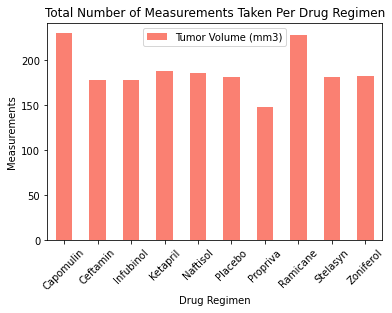

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_df=clean_df.loc[:, ["Drug Regimen","Tumor Volume (mm3)"]]
total_measurements= bar_df.groupby(["Drug Regimen"]).count()

# New DF
measurements_df= pd.DataFrame(total_measurements)

print(measurements_df)

total_measurements.plot(kind="bar", facecolor='salmon', width=.5)

plt.ylabel("Measurements")
plt.xlabel("Drug Regimen")
plt.title("Total Number of Measurements Taken Per Drug Regimen")
plt.xticks(rotation=45)
plt.show()



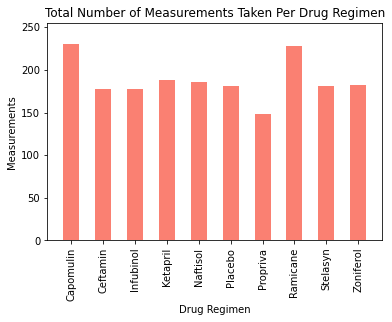

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(measurements_df))
tick_locations = [value for value in x_axis]

# Format
plt.figure(figsize=(6,4))
plt.bar(x_axis, measurements_df["Tumor Volume (mm3)"], facecolor= 'salmon', width = .5)
plt.xticks(tick_locations, measurements_df.index.values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(measurements_df["Tumor Volume (mm3)"])+ 25)

# Set a Title and labels
plt.title("Total Number of Measurements Taken Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel ("Measurements")

# Display
plt.show()



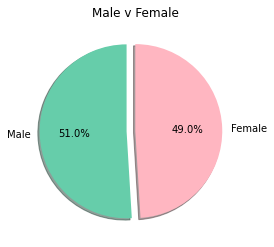

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_count=clean_df["Sex"].value_counts()

#Labels for each section
labels=sex_count.values

#Values of each section 
sizes=sex_count.values

#Colors of each section

colors=["mediumaquamarine", "lightpink"]

#Explode

explode=[0.1,0]

#Make into a pie chart

sex_count.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Male v Female")
plt.ylabel(" ")
plt.show()

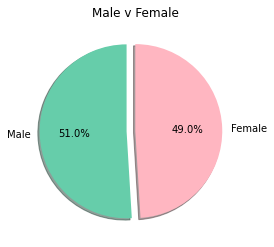

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

clean_count=clean_df["Sex"].value_counts()

#Labels for each section
labels=clean_count.index

#Values of each section 
sizes=clean_count.values

#Colors of each section

colors=["mediumaquamarine", "lightpink"]

#Explode

explode=[0.1,0]

#Print

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

#Formatting
plt.title("Male v Female")
plt.show()


## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 


# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_list = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug_eval = clean_df.loc[clean_df['Drug Regimen'].isin(drug_list)]


# Start by getting the last (greatest) timepoint for each mouse

tumor_volume_df = drug_eval.groupby(drug_eval['Mouse ID']).agg({'Timepoint':['max']})
tumor_volume_df.columns = ['Timepoint']


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_volume_df = tumor_volume_df.reset_index()
tumor_vol_final_df = pd.merge(tumor_volume_df, clean_df, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_final_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [75]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in drug_list:
    
    tumor_vol_by_drug = tumor_vol_final_df['Tumor Volume (mm3)'].loc[tumor_vol_final_df['Drug Regimen'] == drug]
    
    tumor_volumes.append(tumor_vol_by_drug)
    
# Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'For {drug}, values below {lower_bound} could be outliers')
    
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

#tumor_volumes

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



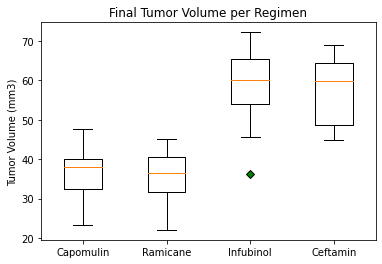

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# format the outliers differently
green_diamond = dict(markerfacecolor='g', marker='D')

# plot
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_xticklabels(drug_list)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volumes, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

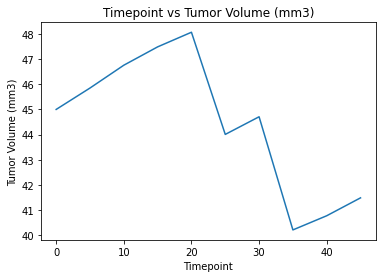

In [77]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_table= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()



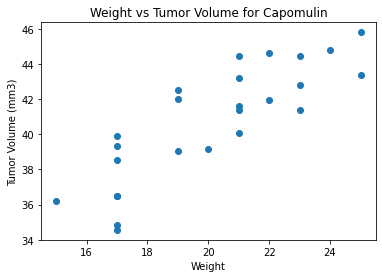

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_weight= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_avg=capomulin_weight.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")




The correlation between mouse weight and average tumor volume is 0.84


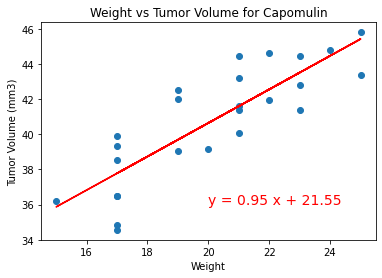

In [80]:

(slope, intercept,rvalue, pvalue, stderr)= linregress(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
regress_values=capomulin_avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg ["Tumor Volume (mm3)"] )
plt.plot(capomulin_avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), color='red', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
